# EDA for Washington, DC Data

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dcdata = pd.read_csv("crashesDCdf_clean.csv", low_memory = False)

In [3]:
dcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246150 entries, 0 to 246149
Data columns (total 61 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  246150 non-null  int64  
 1   X                           246150 non-null  float64
 2   Y                           246150 non-null  float64
 3   OBJECTID                    246150 non-null  int64  
 4   CRIMEID                     246150 non-null  int64  
 5   CCN                         246150 non-null  object 
 6   REPORTDATE                  246150 non-null  object 
 7   ROUTEID                     246150 non-null  object 
 8   MEASURE                     246150 non-null  float64
 9   OFFSET                      246150 non-null  float64
 10  STREETSEGID                 208314 non-null  float64
 11  ROADWAYSEGID                208314 non-null  float64
 12  FROMDATE                    246150 non-null  object 
 13  TODATE        

In [4]:
dcdata['FATAL_DRIVER'].unique()

array([0, 1, 2])

In [5]:
# This is a companion data set to dcdata, linked by "CRIMEID"

dcdetaildata = pd.read_csv("https://opendata.arcgis.com/datasets/70248b73c20f46b0a5ee895fc91d6222_25.csv", low_memory = False)

In [6]:
dcCrashes = dcdata.merge(dcdetaildata, on = "CRIMEID", how = 'outer')

In [7]:
dcCrashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597962 entries, 0 to 597961
Data columns (total 75 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  597502 non-null  float64
 1   X                           597502 non-null  float64
 2   Y                           597502 non-null  float64
 3   OBJECTID_x                  597502 non-null  float64
 4   CRIMEID                     597962 non-null  int64  
 5   CCN_x                       597502 non-null  object 
 6   REPORTDATE                  597502 non-null  object 
 7   ROUTEID                     597502 non-null  object 
 8   MEASURE                     597502 non-null  float64
 9   OFFSET                      597502 non-null  float64
 10  STREETSEGID                 511703 non-null  float64
 11  ROADWAYSEGID                511703 non-null  float64
 12  FROMDATE                    597502 non-null  object 
 13  TODATE        

In [9]:
# Check the format for the report dates

dcCrashes['REPORTDATE'].head()

0    2021/03/10 02:41:05+00
1    2021/03/10 02:41:05+00
2    2021/03/10 02:57:24+00
3    2021/03/10 02:57:24+00
4    2021/03/10 03:23:07+00
Name: REPORTDATE, dtype: object

In [11]:
# Change to date-time format, then separate years and years-months for comparison

dcCrashes['REPORTDATE'] = pd.to_datetime(dcCrashes['REPORTDATE'])
dcCrashes['YEAR'] = pd.DatetimeIndex(dcCrashes['REPORTDATE']).year
dcCrashes['MONTH_YEAR'] = pd.to_datetime(dcCrashes['REPORTDATE']).dt.to_period('M')

/Users/maryglantz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [33]:
dcCrashes['YEAR'].head()

0    2021.0
1    2021.0
2    2021.0
3    2021.0
4    2021.0
Name: YEAR, dtype: float64

In [12]:
dcCrashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597962 entries, 0 to 597961
Data columns (total 77 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   Unnamed: 0                  597502 non-null  float64            
 1   X                           597502 non-null  float64            
 2   Y                           597502 non-null  float64            
 3   OBJECTID_x                  597502 non-null  float64            
 4   CRIMEID                     597962 non-null  int64              
 5   CCN_x                       597502 non-null  object             
 6   REPORTDATE                  597502 non-null  datetime64[ns, UTC]
 7   ROUTEID                     597502 non-null  object             
 8   MEASURE                     597502 non-null  float64            
 9   OFFSET                      597502 non-null  float64            
 10  STREETSEGID                 511703 non-null 

## Fatal Crashes in DC

In [23]:
dcCrashes['FATAL'].unique()

array(['N', nan, 'Y'], dtype=object)

In [27]:
# How many of my entries are na for Fatalities?
dcCrashes['FATAL'].isna().sum()

1828

In [30]:
# Since I'm just counting fatalities, 1828 of about 60000 should be fine.  
isfatal = dcCrashes['FATAL'] == 'Y'
fatalCrashes = dcCrashes[isfatal]
fatalCrashes['FATAL']

3632      Y
6325      Y
8062      Y
10104     Y
11333     Y
         ..
583040    Y
587906    Y
592080    Y
592689    Y
596271    Y
Name: FATAL, Length: 416, dtype: object

In [31]:
fatalCrashes.groupby(['YEAR']).size()

YEAR
1970.0     2
2008.0    11
2009.0    25
2010.0    21
2011.0    22
2012.0    24
2013.0    44
2014.0    53
2015.0    49
2016.0    36
2017.0    34
2018.0    32
2019.0    27
2020.0    32
2021.0     4
dtype: int64

#### Fatal Crashes in DC **declined** from 34 in 2017 to 32 in 2020, or by 5%.  

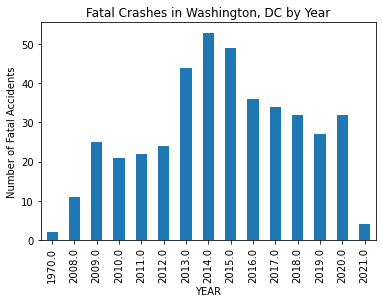

In [40]:
plt.title("Fatal Crashes in Washington, DC by Year")
plt.xlabel("Year")
plt.ylabel("Number of Fatal Accidents")

fatalCrashes.groupby(['YEAR']).size().plot(kind = 'bar')


The visualization shows, however, that despite the overall decline from 2017, 2020 did uptick from 2019.  

Let's categorize the data by type of fatality, and see if it varies.

In [36]:
fatalCrashes["FATAL_PEDESTRIAN"].unique()

array([0., 1., 2.])

In [38]:
fatalCrashes["FATAL_DRIVER"].unique()

array([1., 0., 2.])

In [39]:
fatalCrashes["FATAL_BICYCLIST"].unique()

array([0., 1.])

This data lists the number of fatalities of each type per each incident.  

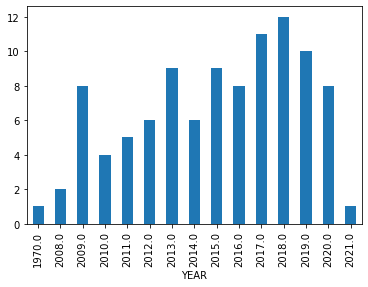

In [45]:
fatalPeds = fatalCrashes["FATAL_PEDESTRIAN"] != 0
fatalPedsCrash = fatalCrashes[fatalPeds]
fatalPedsCrash.groupby(['YEAR']).size().plot(kind = 'bar')

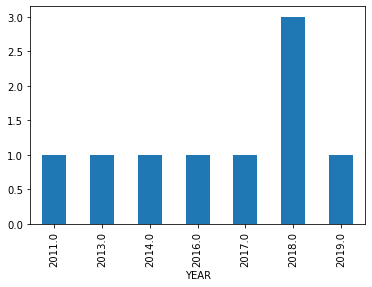

In [46]:
fatalBikes = fatalCrashes["FATAL_BICYCLIST"] != 0
fatalBikesCrash = fatalCrashes[fatalBikes]
fatalBikesCrash.groupby(['YEAR']).size().plot(kind = 'bar')

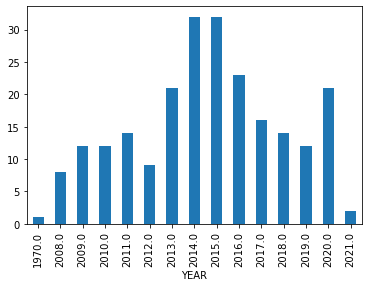

In [47]:
fatalCars = fatalCrashes["FATAL_DRIVER"] != 0
fatalCarsCrash = fatalCrashes[fatalCars]
fatalCarsCrash.groupby(['YEAR']).size().plot(kind = 'bar')

This is a little surprising.  I suspected that with the pandemic, more people were walking and biking, and, thus, those numbers would have increased.  Paradoxically, the fatalities to people inside the vehicle actually increased.  Perhaps this was due to a decrease in traffic, resulting in less traffic, but more severe crashes.

Sadly, DC does not have traffic volume data for 2020 available yet (the most recent is 2018).